In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Project_3/Netflix_Engagement_Report_2023_Jan-Jun_cleaned.csv")

In [2]:
# Quick overbiew
print(df.head())

                                 Title Available Globally Release Date  \
0            The Night Agent: Season 1                Yes    3/23/2023   
1            Ginny & Georgia: Season 2                Yes     1/5/2023   
2   The Glory: Season 1 // 더 글로리: 시즌 1                Yes   12/30/2022   
3                  Wednesday: Season 1                Yes   11/23/2022   
4  Queen Charlotte: A Bridgerton Story                Yes     5/4/2023   

   Hours Viewed  
0     812100000  
1     665100000  
2     622800000  
3     507700000  
4     503000000  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               18214 non-null  object
 1   Available Globally  18214 non-null  object
 2   Release Date        4855 non-null   object
 3   Hours Viewed        18214 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 569.3+ KB
None


In [4]:
print(df.describe())

       Hours Viewed
count  1.821400e+04
mean   5.130954e+06
std    1.871767e+07
min    1.000000e+05
25%    2.000000e+05
50%    7.000000e+05
75%    3.400000e+06
max    8.121000e+08


In [5]:
# Check for missing values
print(df.isnull().sum())

Title                     0
Available Globally        0
Release Date          13359
Hours Viewed              0
dtype: int64


In [6]:
# Fill missing release dates
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Date'].fillna(pd.NaT, inplace=True)

# Standardize Available Globally column
df['Available Globally'] = df['Available Globally'].map({'Yes': 1, 'No': 0})

# Check cleaned data
print(df.head())
print(df.isnull().sum())


                                 Title  Available Globally Release Date  \
0            The Night Agent: Season 1                   1   2023-03-23   
1            Ginny & Georgia: Season 2                   1   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                   1   2022-12-30   
3                  Wednesday: Season 1                   1   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                   1   2023-05-04   

   Hours Viewed  
0     812100000  
1     665100000  
2     622800000  
3     507700000  
4     503000000  
Title                     0
Available Globally        0
Release Date          13359
Hours Viewed              0
dtype: int64


C:\Users\Admin1\AppData\Local\Temp\ipykernel_16488\3680474946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release Date'].fillna(pd.NaT, inplace=True)


In [7]:
# Top 10 Shows by Hours Viewed
top10 = df.sort_values(by='Hours Viewed', ascending=False).head(10)
print(top10[['Title','Hours Viewed']])


                                 Title  Hours Viewed
0            The Night Agent: Season 1     812100000
1            Ginny & Georgia: Season 2     665100000
2   The Glory: Season 1 // 더 글로리: 시즌 1     622800000
3                  Wednesday: Season 1     507700000
4  Queen Charlotte: A Bridgerton Story     503000000
5                        You: Season 4     440600000
6           La Reina del Sur: Season 3     429600000
7                Outer Banks: Season 3     402500000
8            Ginny & Georgia: Season 1     302100000
9                      FUBAR: Season 1     266200000


In [8]:
# Total Watch Hours by Month
df['Month'] = df['Release Date'].dt.to_period('M')
monthly_views = df.groupby('Month')['Hours Viewed'].sum().reset_index()
print(monthly_views.head())


     Month  Hours Viewed
0  2010-04      35900000
1  2010-09      33200000
2  2011-03      12300000
3  2011-09      94700000
4  2012-02       3500000


In [9]:
# Global vs Non-Global Availability Impact
global_views = df.groupby('Available Globally')['Hours Viewed'].mean()
print(global_views)


Available Globally
0    3.307803e+06
1    1.066422e+07
Name: Hours Viewed, dtype: float64


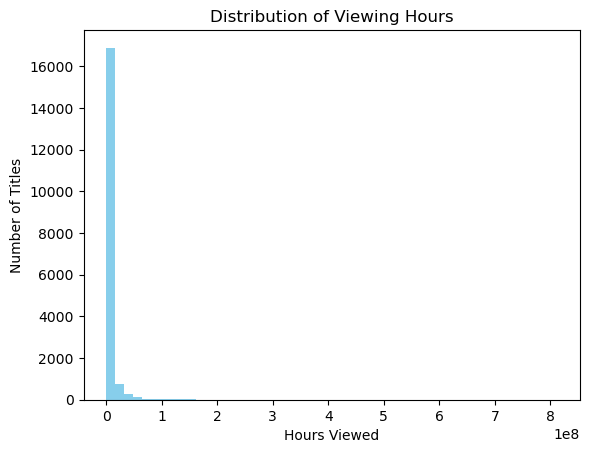

In [10]:
# Distribution of Viewing Hours
import matplotlib.pyplot as plt

plt.hist(df['Hours Viewed'], bins=50, color='skyblue')
plt.title('Distribution of Viewing Hours')
plt.xlabel('Hours Viewed')
plt.ylabel('Number of Titles')
plt.show()


In [11]:
df.to_csv('netflix_engagement_clean.csv', index=False)


In [12]:
# Top 10 Titles
top10 = df.sort_values(by='Hours Viewed', ascending=False).head(10)
top10.to_csv('top10_titles.csv', index=False)

# Monthly Views
monthly_views.to_csv('monthly_views.csv', index=False)

# Global vs Non-Global
global_views_df = df.groupby('Available Globally')['Hours Viewed'].mean().reset_index()
global_views_df.to_csv('global_vs_nonglobal.csv', index=False)
